# Chapter 2 : A native prediction of the future

## Illustration from defining a baseline model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [12]:
df = pd.read_csv('../ch02/jj.csv')
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


In [13]:
df.head(4)

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44


In [14]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


### Plot data with train/test split

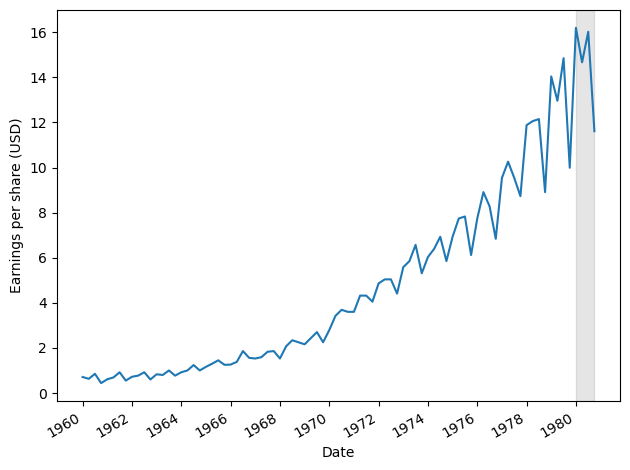

In [18]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(
    np.arange(0, 81, 8), 
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

### Split to train/test

In [19]:
train = df[:-4]
test = df[-4:]

### Predict Historical Mean

In [20]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [21]:
test.loc[:, 'pred_mean'] = historical_mean
test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [22]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], label='Train')